In [1]:
import os
import sys
sys.path.insert(0,'..')
import numpy as np
from analysis.tf_utils import *
from analysis.analysis_utils import *
import matplotlib.pyplot as plt
from analysis.summary import run_summary
%matplotlib inline

# Experiment settings

In [2]:
base_dir = ""
task_dir = "datasweep_suppb.pkl"
task_dir2 = "datasweep_main_long_lfp.pkl"

summary_settings = {
    "upsample" : 1, # Increase temporal resolution
    "ref_phase" : "sine", # Reference phase for 'spike-phase' histogram, either sine or LFP
    "onlyGaba" : False,  # Only use inhibitory neurons for calculating LFP
    "cutoff_p": 10e-3, # For Wilc p test
    "normalize_fr_extract":  True,  # Normalize extracted firing rates
    "n_trials": 224,  # Number trials used in analysis
    "randomize_onset": False, # Randomise stimulus onset
    "delay_ms": 10000, # Delay time in ms
    "disable_noise": False, # With or without noise
    "freqs_l": np.logspace(*np.log10([0.33, 5]), num=60), # Frequencies for spectrograms
    "balance_trials": True, # Draw trials with balanced proportion of each stimuli
    "substr_mean_LFP": False, # Substract mean LFP
    "delay_buffer1": 25, # Disregard short period after stimulus offset
    "delay_buffer2": 25, # Disregard short period before probe onset
    "nbins": 1, # Number of bins for 'spike' phase histograms
    "common_baseline" : True, # Common baseline
    "freqs": [] # Frequencies for vex plots
}
pltcolors, pltcolors_alt = steffiscolours()


# Run or load summary over many models

In [3]:
#note that the accuracy here is bad, because of the long delay 
#period used for accurate power calculation

model_dir = os.path.join(base_dir, "..", "models/sweep_suppb")
data_dir = "../data/"+str(task_dir)
data_list, summary_settings = run_summary(summary_settings, model_dir, data_dir)

model_dir2 = os.path.join(base_dir, "..", "models/sweep_main")
data_dir2 = "../data/"+str(task_dir2)
ress,_ = run_summary(summary_settings, model_dir2, data_dir2)
data_list2=ress['results']
summary_settings2=ress['summary_settings']

In [4]:
ress['summary_settings']

{'upsample': 1,
 'ref_phase': 'sine',
 'onlyGaba': False,
 'cutoff_p': 0.01,
 'normalize_fr_extract': True,
 'n_trials': 224,
 'randomize_onset': False,
 'delay_ms': 10000,
 'stim_ons': 1000,
 'disable_noise': False,
 'freqs_l': array([0.33      , 0.34555857, 0.36185069, 0.37891093, 0.39677551,
        0.41548236, 0.43507118, 0.45558357, 0.47706305, 0.49955523,
        0.52310785, 0.54777092, 0.57359677, 0.60064025, 0.62895874,
        0.65861238, 0.6896641 , 0.72217982, 0.75622857, 0.79188261,
        0.82921765, 0.86831293, 0.90925144, 0.95212009, 0.99700987,
        1.04401608, 1.0932385 , 1.14478162, 1.19875485, 1.25527277,
        1.31445535, 1.37642822, 1.44132293, 1.50927725, 1.58043543,
        1.65494851, 1.73297468, 1.81467956, 1.90023659, 1.9898274 ,
        2.08364216, 2.18188002, 2.28474953, 2.39246904, 2.50526722,
        2.62338352, 2.74706867, 2.87658523, 3.01220812, 3.15422526,
        3.3029381 , 3.45866234, 3.62172854, 3.79248284, 3.97128774,
        4.15852278, 4.35

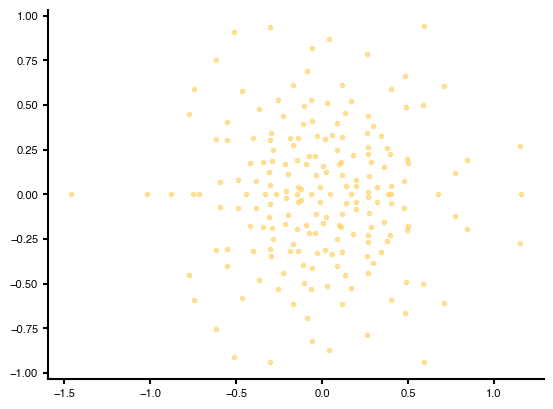

In [5]:
def relu (x):
    return np.maximum(x,0)
i=13
w_eff = relu(data_list['w_rec'][i][0])@data_list['w_rec'][i][1]
e = np.linalg.eigvals(w_eff)
plt.plot(e.real, e.imag, 'o', color=pltcolors[0], alpha=0.5)

([<matplotlib.axis.YTick at 0x280f92e90>,
 [Text(0, 0.0, '0.0'), Text(0, 0.2, '0.2'), Text(0, 0.4, '0.4')])

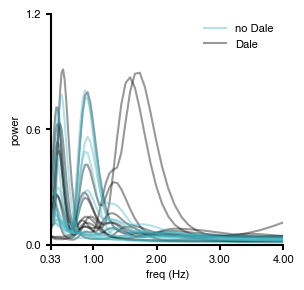

In [6]:

color1 = 'black'
color2 = pltcolors_alt[1]
ls1='-'
ls2='-'
alpha = 0.4
zorder1 = 1
zorder2 = 2
legend1 = True
legend2 = True
plt.figure(figsize = (3,3))

t1 = 300
t2 = 900
for i in range(24):
    if np.sum(data_list['w_rec'][i][1]) <150:
        plt.plot(summary_settings['freqs_l'],np.mean(data_list['post_spectrum'][i][:,t1:t2],axis=1), 
                 color = color1,alpha=alpha, ls = ls1,label='Dale' if legend1 else '',zorder =zorder1)
        if legend1:
            legend1=False
    else:
        plt.plot(summary_settings['freqs_l'],np.mean(data_list['post_spectrum'][i][:,t1:t2],axis=1), 
                 color = color2,alpha=alpha, ls = ls2,label='no Dale' if legend2 else '',zorder =zorder2)
        if legend2:
            legend2=False
            
plt.xlim(0.33,4)
plt.legend()
plt.ylim(0,1.2)
plt.xticks([0.33,2,1,3,4])
plt.legend()
plt.xlabel("freq (Hz)")
plt.ylabel("power")
plt.savefig("../figures/Supp_b1", facecolor="white", transparent=False)
plt.yticks([0,0.6,1.2])



(array([6., 3., 0., 2., 2., 3., 5., 3.]),
 array([0.11407665, 0.21367514, 0.31327362, 0.41287211, 0.51247059,
        0.61206908, 0.71166756, 0.81126605, 0.91086453]),
 <BarContainer object of 8 artists>)

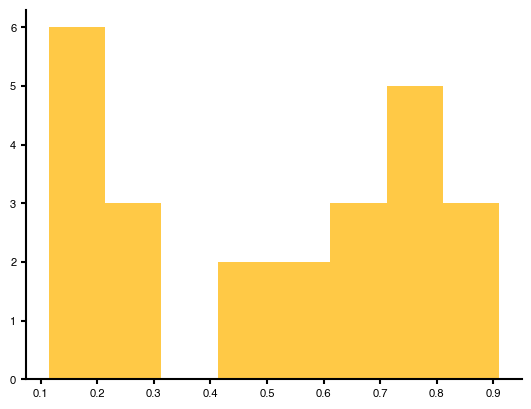

In [7]:
powers_b = []
for i in range(24):
    powers_b.append(np.max(np.mean(data_list['post_spectrum'][i][:,t1:t2],axis=1)))
np.mean(powers_b)
plt.hist(powers_b,bins=8)

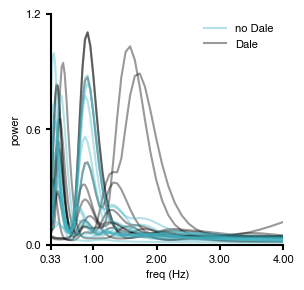

In [8]:

color1 = 'black'
color2 = pltcolors_alt[1]
ls1='-'
ls2='-'
alpha = 0.4
zorder1 = 1
zorder2 = 2
legend1 = True
legend2 = True
plt.figure(figsize = (3,3))
t1 = 1340
t2 = 1940
for i in range(24):
    if np.sum(data_list['w_rec'][i][1]) <150:
        plt.plot(summary_settings['freqs_l'],np.mean(data_list['post_spectrum'][i][:,t1:t2],axis=1), 
                 color = color1,alpha=alpha, ls = ls1,label='Dale' if legend1 else '',zorder =zorder1)
        if legend1:
            legend1=False
    else:
        plt.plot(summary_settings['freqs_l'],np.mean(data_list['post_spectrum'][i][:,t1:t2],axis=1), 
                 color = color2,alpha=alpha, ls = ls2,label='no Dale' if legend2 else '',zorder =zorder2)
        if legend2:
            legend2=False
            
plt.xlim(0.33,4)
plt.xticks([0.33,2,1,3,4])
plt.yticks([0,0.6,1.2])


plt.legend()
plt.ylim(0,1.2)
plt.legend()
plt.xlabel("freq (Hz)")
plt.ylabel("power")
plt.savefig("../figures/Supp_b2", facecolor="white", transparent=False)


In [9]:
data_list2[0]['post_spectrum'].shape

(60, 2320)

In [10]:
print(len(summary_settings['freqs_l']))
print(np.mean(data_list2[0]['post_spectrum'][:,t1:t2]).shape)

60
()


26


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


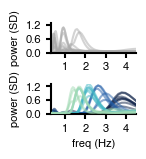

In [11]:
freqs_l=summary_settings['freqs_l']
color1 = 'black'
color2 = pltcolors_alt[1]
ls1='-'
ls2='-'
alpha = 1
zorder1 = 1
zorder2 = 2
legend1 = True
legend2 = True
fig,axs = plt.subplots(2,figsize = (1.5,1.5))

color1 = 'darkgrey'
ls1='-'
alpha = .5
t1 = 1340
t2 = 1940
for i in range(24):
    if np.sum(data_list['w_rec'][i][1]) <150:
        axs[0].plot(summary_settings['freqs_l'],np.mean(data_list['post_spectrum'][i][:,t1:t2],axis=1), 
                 color = color1,alpha=alpha, ls = ls1,label='Dale' if legend1 else '',zorder =zorder1)

            
axs[0].set_xlim(.3,4.5)
axs[0].set_xticks([1,2,3,4])
axs[0].set_yticks([0,0.6,1.2])


axs[0].set_ylim(0,1.3)
#plt.xlabel("freq (Hz)")
axs[0].set_ylabel("power (SD)")


#freqs_l = np.logspace(*np.log10([1, 20]), num=50)
mod_frs = [data_list2[i]['loss_f'] for i in range(len(data_list2))]

color_inds =3-np.argsort(mod_frs)[::-1].argsort()//10
num_s =0

for i in range(40):
    freq = freqs_l[np.argmax(np.mean(data_list2[i]['post_spectrum'][:,t1:t2],axis=1))]
    if np.isclose(data_list2[i]['loss_f'],freq,atol=0.5):
        color=pltcolors_alt[color_inds[i]]
        axs[1].plot(freqs_l,np.mean(data_list2[i]['post_spectrum'][:,t1:t2],axis=1), 
                    color = color,alpha=alpha, ls = ls2,zorder =3-color_inds[i])

        num_s+=1
axs[1].set_xlim(.3,4.5)
axs[1].set_xticks([1,2,3,4])
axs[1].set_yticks([0,0.6,1.2])

print(num_s)

axs[1].set_ylim(0,1.3)

axs[1].set_xlabel("freq (Hz)")
axs[1].set_ylabel("power (SD)")
plt.tight_layout()
plt.savefig("../figures/Supp_b2.pdf", facecolor="white", transparent=False)


(array([2., 1., 1., 3., 3., 1., 5., 3., 2., 3.]),
 array([0.27692137, 0.35961991, 0.44231846, 0.525017  , 0.60771554,
        0.69041408, 0.77311262, 0.85581116, 0.9385097 , 1.02120825,
        1.10390679]),
 <BarContainer object of 10 artists>)

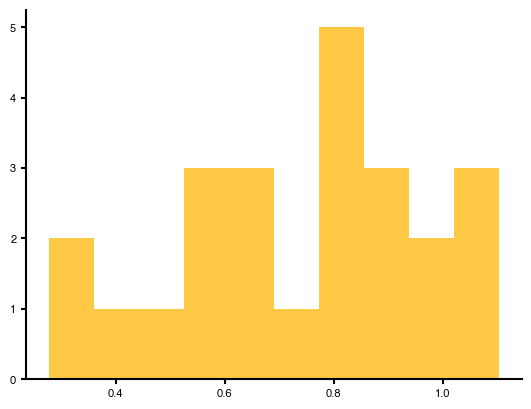

In [12]:
powers_d = []
for i in range(24):
    powers_d.append(np.max(np.mean(data_list['post_spectrum'][i][:,t1:t2],axis=1)))
np.mean(powers_d)
plt.hist(powers_d)

In [13]:
from scipy.stats import ranksums
ranksums(powers_b,powers_d,alternative='two-sided')

RanksumsResult(statistic=-2.7424137786507226, pvalue=0.006098945931214355)